<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Introducción a Machine Learning</h1>
<br/><br/>
    <b>Instructor Principal:</b> Jesús Ortiz jortiz@codingdojo.la <br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblancocodingdojo.la<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# ¿Qué es Machine Learning?

- Machine Learning (de ahora en adelante, **ML**), se define como el conjunto de técnicas a través de los cuales un computador puede aprender de los datos.

<img src="images/diagrama.png" alt="" width="800px" align="center"/>

# ¿Por qué utilizar Machine Learning?

### Ej. Creación de un filtro de spam para correos electrónicos

- Aproximación tradicional

<img src="images/withoutML.png" alt="" width="500px" align="center"/>

# ¿Por qué utilizar Machine Learning?

### Ej. Creación de un filtro de spam para correos electrónicos

- Aproximación de ML

<img src="images/withML.png" alt="" width="500px" align="center"/>

# Tipos de algoritmos de ML

Existen distintas clasificaciones

- Algoritmos entrenados con o sin supervisión humana:
    * Supervisados
    * No supervisados
    * Semi supervisados
    * Por refuerzo
- Algoritmos de aprendizaje incremental:
    * Online
    * Offline/por lote (batch)
- Algoritmos de detección de patrones o de comparación:
    * Basados en instancia
    * Basados en modelo

# Bibliotecas para ML python

<img src="images/bibliotecas.png" alt="" width="800px" align="center"/>

# Scikit-Learn

<img src="images/ml-libraries/scikit-learn-logo-notext.png" alt="" width="200px" align="center"/>

- Biblioteca para ML de código libre
- Biblioteca para Python
- Soporta múltiples algoritmos tanto supervisados como no supervisados
-  Si está trabajando en su entorno local, previo a su importación debe ser **instalada** 
    - ```pip install scikit-learn``` si usa ```pip```
    - ```conda install scikit-learn``` si usa ```conda```

# Scikit-Learn: Utilización

Todo los objetos Scikit-Learn son **consistentes** entre sí
* **Estimadores:** 
    - Método encargado de la **estimación** de los parámetros asociados al algoritmo. 
    - Objetos Scikit-Learn incluyen el método *fit()*, cuya entrada es el set de datos utilizados para el cálculo de los parámetros.
* **Transformadores:** 
    - Método encargado de la **transformación** de datos en base a los parámetros calculados por método *fit()*. 
    - Objetos Scikit-Learn incluyen el método *transform()*, que recibe con los datos a transformar.
    - Método *fit_transform()* permite realizar ambos pasos con un solo método.
* **Predictores:** 
    - Método encargado de hacer **predicciones** en base a datos de entrada.
    - Objetos Scikit-Learn incluyen el método *predict()*, para realizar predicciones en base a parámetros de entrada.
        
Cuáles de estos métodos están presentes, dependerá del tipo algoritmo a utilizar.
    

# Tipos de características

- Cada set de datos puede poseer una múltiples características representadas por sus columnas
- Cada característica puede ser de tipo:
    * Numérica: Característica cuantitativa
    * Nominales: Característica conformada por clases no ordenadas
    * Ordinales: Característica conformada por clases ordenadas

# Transformación de características

- Normalmente los modelos de Machine Learning tienen problemas para trabajar con características no numéricas.
- Este tipo de características deben ser transformadas:
    * Ordinales: Reemplazar clases por números ordenados
    * Nominales: One Hot Encoder

# Transformación de características: ordinal

In [6]:
# Transformación ordinal
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Dataset de prueba: cargamos los datos
df = pd.DataFrame(['bad', 'good', 'good', 'average','bad','average', 'good'])
df2=pd.DataFrame(['good', 'good','good', 'good', 'average','average', 'good','medium'])
df

,0
0,bad
1,good
2,good
3,average
4,bad
5,average
6,good


In [8]:
# Creamos un objeto OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['bad','average', 'medium','good' ]])
ordinal_encoder.fit(df2) # Estimamos los parámetros internos con fit()
# En este punto, ordinal_encoder ya aprendió como debe reemplazar los elementos
# de esta categoría
serie_encoded = ordinal_encoder.transform(df2) # Transformamos los datos de df a números


In [9]:
serie_encoded_2 = ordinal_encoder.transform(df2) # Transformamos los datos de df a números

In [10]:
serie_encoded

array([[3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [2.]])

In [5]:
print("Datos originales", df)
print("Serie codificada", serie_encoded)
print("Categorías", ordinal_encoder.categories_)

Datos originales          0
0      bad
1     good
2     good
3  average
4      bad
5  average
6     good
Serie codificada [[0.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]]
Categorías [array(['bad', 'average', 'good'], dtype=object)]


In [11]:
# El reemplazo ordinal no siempre es la mejor opción
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

df = pd.DataFrame(['red', 'blue', 'blue', 'green','red','green', 'red'])
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(df)
serie_encoded = ordinal_encoder.transform(df)
print("Datos originales", df)
print("Serie codificada", serie_encoded)
print("Categorías", ordinal_encoder.categories_)
# ¿Tiene sentido que el azul sea menor que el verde?

Datos originales        0
0    red
1   blue
2   blue
3  green
4    red
5  green
6    red
Serie codificada [[2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [2.]]
Categorías [array(['blue', 'green', 'red'], dtype=object)]


# Transformación de características: One Hot Encoder

- One Hot Encoder codifica las categorías de una columna de datos, como una nueva columna por cada categoría.
- Cuando un dato posee una cierta categorías, se marca su respectiva columna con un 1 y el resto de columnas con cero.
- Esto asegura que todos las categorías tengan **la misma distancia entre sí**

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Creamos dataframe de datos no ordinales
df = pd.DataFrame(['red', 'blue', 'blue', 'green','red','green', 'red'])
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(df) # Aprendemos la codificación one hot a partir de nuestros datos
serie_encoded = one_hot_encoder.transform(df) # Transformamos los datos según lo aprendido¿
# Transformando a dataframe
df_encoded = pd.DataFrame(serie_encoded.toarray(), columns=one_hot_encoder.categories_)
df_encoded

Datos originales        0
0    red
1   blue
2   blue
3  green
4    red
5  green
6    red
Serie codificada [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
Categorías [array(['blue', 'green', 'red'], dtype=object)]


In [15]:
df

,0
0,red
1,blue
2,blue
3,green
4,red
5,green
6,red


,blue,green,red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0


# Escalamiento

- Modificación del rango de valores de una característica numérica
- Tipos comunes de escalamiento:
    * Escalamiento min-max (normalización): Rango entre 0 (mínimo) y 1 (máximo)
    * Estandarización: Escalamiento a media cero y varianza unitaria
    

# Estandarización con Scikit-Learn

In [1]:
import pandas as pd
df = pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
X_num=X[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]

In [7]:
# Esta biblioteca se encarga de el escalamiento por estandarización
# Es decir, bajo el supuesto que los datos se comportan como una 
# distribución normal
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # Creación de objeto StandardScaler
scaler.fit(X_num) # Cálculo de parámetros de escalamiento
X_scaled= scaler.transform(X_num) # Transformación de los datos
X_scaled=pd.DataFrame(X_scaled, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'])
X_scaled.describe()

In [11]:
# Esta biblioteca se encarga de el escalamiento por estandarización
# Es decir, bajo el supuesto que los datos se comportan como una 
# distribución normal
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Creación de objeto StandardScaler
scaler.fit(X_num) # Cálculo de parámetros de escalamiento
X_scaled= scaler.transform(X_num) # Transformación de los datos
X_scaled=pd.DataFrame(X_scaled, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'])
X_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083313,0.039869,0.081983,0.232464
std,0.199555,0.226988,0.246776,0.055486,0.065392,0.031740,0.062873,0.131020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045779,0.021974,0.045881,0.142308
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295


# Estandarización con Scikit-Learn

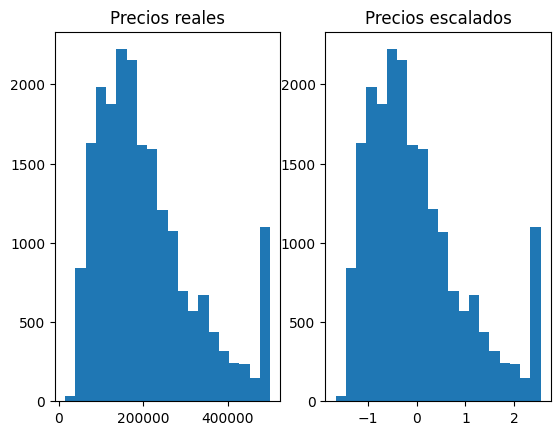

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.hist(df['median_house_value'], bins=20)
ax1.set_title('Precios reales')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(price_scaled, bins=20)
ax2.set_title('Precios escalados')

plt.show()

# Column Transform

- Podemos paralelizar el proceso de transformación de múltiples columnas de datos de distintos tipos utilizando Column Transformers

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer

df = pd.read_csv('data/housing.csv')[['median_income', 'median_house_value', 'ocean_proximity']]
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
 2   ocean_proximity     20640 non-null  object 
dtypes: float64(2), object(1)
memory usage: 483.9+ KB


,median_income,median_house_value,ocean_proximity
0,8.3252,452600.0,NEAR BAY
1,8.3014,358500.0,NEAR BAY
2,7.2574,352100.0,NEAR BAY
3,5.6431,341300.0,NEAR BAY
4,3.8462,342200.0,NEAR BAY
...,...,...,...
20635,1.5603,78100.0,INLAND
20636,2.5568,77100.0,INLAND
20637,1.7000,92300.0,INLAND
20638,1.8672,84700.0,INLAND


In [15]:
# Selectores de columnas por tipos. También es posible utilizar patrones de expresiones
# regulares para selección de columnas
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Transformadores
one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()


# Transformación
col_transformer = make_column_transformer((standard_scaler, num_selector),
                                          (one_hot_encoder, cat_selector), 
                        remainder = 'passthrough') # Si existe alguna columna que no caiga en las categorías, pasa tal cual

# Recuerden que col_transformer.fit_transform(df) es una forma abreviada de escribir
# col_transformer.fit(df) # Aquí estimamos los parámetros para todas las transformaciones
# col_transformer.transform(df) # Aquí aplicamos dichas transformaciones sobre el dataframe
tra=col_transformer.fit_transform(df)
df_encoded = pd.DataFrame(tra,columns=col_transformer.get_feature_names_out())
df_encoded
# También es posible utilizar la clase ColumnTransform la cual es mucho más versátil
# que la función make_column_transformer

In [48]:
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector), )
col_transformer
preprocessing_pipeline = make_pipeline(col_transformer)
preprocessing_pipeline
df_encoded = pd.DataFrame(tra,columns=preprocessing_pipeline.get_feature_names_out())
df_encoded
# También es posible utilizar la clase ColumnTransform la cual es mucho más versátil
# que la función make_column_transformer

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16e949dc0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1691a4be0>)]))])

In [46]:
df_encoded = pd.DataFrame(tra,columns=preprocessing_pipeline.get_feature_names_out())
df_encoded
# También es posible utilizar la clase ColumnTransform la cual es mucho más versátil
# que la función make_column_transformer

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-1__median_house_value,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,0.0,1.0,0.0,0.0,0.0


# Imputer

- SimpleImputer es una clase de Scikit-Learn que permite el manejo sencillo de columnas de características con valores nulos

In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv('data/housing.csv')
df_num = df.drop("ocean_proximity", axis=1) # borrando columna no numérica
df_num.info()
# Valores nulos en columna total_bedrooms
imputer = SimpleImputer(strategy="median")
imputer.fit(df_num)
print(imputer.statistics_) # valores de mediana por cada columna numérica
df_tr = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns, index=df_num.index)
df_tr.info() # Valores nulos reemplazados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

In [2]:
imputer = SimpleImputer(strategy="median")
imputer.fit(df_num)
print(imputer.statistics_) # valores de mediana por cada columna numérica
df_tr = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns, index=df_num.index)
df_tr.info() # Valores nulos reemplazados

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Pipelines

- A diferencia de los ColumnTransformers, los Pipeline pueden realizar múltiples operaciones sobre un dataset **en secuencia**.
- Los pipelines **pueden incluir modelos** como operaciones compatibles y otros elementos de Scikit-Learn siempre y cuando ellos cuenten con los métodos *fit* y *transform*

In [21]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
# Crearemos una tubería que incluya dos operaciones: Imputación y Escalamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Ojo, las siguientes dos líneas son opcionales
# Permiten ver visualmente el pipeline creado
from sklearn import set_config
set_config(display='diagram') # Para mostrar como diagrama

# Datos estadísticos sobre diferentes países
df = pd.read_csv('data/life_expectancy.csv', index_col='CountryYear')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, Afghanistan2015 to Zimbabwe2000
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2928 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   int64  
 3   infant deaths                    2928 non-null   int64  
 4   Alcohol                          2735 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6   Hepatitis B                      2375 non-null   float64
 7   Measles                          2928 non-null   int64  
 8   BMI                              2896 non-null   float64
 9   under-five deaths                2928 non-null   int64  
 10  Polio                            2909 non-null   float64
 11  Total expenditure                2702 non-null   float64
 12  Dip

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
CountryYear,,,,,,,,,,,,,,,,,,,,
Afghanistan2015,0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan2014,0,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan2013,0,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan2012,0,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan2011,0,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe2004,0,44.3,723,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
Zimbabwe2003,0,44.5,715,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
Zimbabwe2002,0,44.8,73,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [22]:
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
# Creación de pipeline a partir de sus componentes. En
# este ejemplo, el imputer y el scaler
preprocessing_pipeline = make_pipeline(imputer, scaler)
preprocessing_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [24]:
tra=preprocessing_pipeline.fit_transform(df)
tra

array([[ 0.        , -0.4436909 ,  0.79023802, ...,  2.77143055,
        -0.7357567 , -0.58885659],
       [ 0.        , -0.97927911,  0.85461353, ...,  2.81600606,
        -0.75036199, -0.6195894 ],
       [ 0.        , -0.97927911,  0.83047271, ...,  2.86058157,
        -0.77957258, -0.65032221],
       ...,
       [ 0.        , -2.56504028, -0.73868044, ..., -0.79461022,
        -0.98891514, -0.6195894 ],
       [ 0.        , -2.51253163,  4.19409332, ..., -0.7054592 ,
        -0.98891514, -0.68105502],
       [ 0.        , -2.43901952,  4.02510759, ...,  1.41187751,
        -0.95483612, -0.68105502]])

In [26]:
df_processed = pd.DataFrame(tra, columns=df.columns, index=df.index)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, Afghanistan2015 to Zimbabwe2000
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2928 non-null   float64
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2928 non-null   float64
 4   Alcohol                          2928 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6   Hepatitis B                      2928 non-null   float64
 7   Measles                          2928 non-null   float64
 8   BMI                              2928 non-null   float64
 9   under-five deaths                2928 non-null   float64
 10  Polio                            2928 non-null   float64
 11  Total expenditure                2928 non-null   float64
 12  Dip

# División en set de training y test

- Los modelos de Machine Learning intentan aprender patrones en los datos que le permitan hacer predicciones.
- Al momento de evaluar un modelo, se desea estimar qué tan bien es capaz de **generalizar** a partir de los datos usados en el proceso de aprendizaje. (¿Puedo hacer predicciones sobre nuevos datos a partir de lo ya aprendido?)
- Para ello, siempre es necesario dividir nuestro data set en dos grupos:
    * **Training set**: Es el subconjunto de datos que será utilizado para entrenar nuestro modelo.
    * **Test set**: Es el subconjunto de datos que será utilizado para evaluar la generalización de nuestro modelo.

In [11]:
# Ejemplo de división de datos de entrenamiento y de prueba
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Datos estadísticos sobre diferentes países
df = pd.read_csv('data/life_expectancy.csv', index_col='CountryYear')
X = df.drop(["Life expectancy"], axis=1) # Features
y = df["Life expectancy"] # Target
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, Afghanistan2015 to Zimbabwe2000
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2928 non-null   int64  
 1   Adult Mortality                  2928 non-null   int64  
 2   infant deaths                    2928 non-null   int64  
 3   Alcohol                          2735 non-null   float64
 4   percentage expenditure           2928 non-null   float64
 5   Hepatitis B                      2375 non-null   float64
 6   Measles                          2928 non-null   int64  
 7   BMI                              2896 non-null   float64
 8   under-five deaths                2928 non-null   int64  
 9   Polio                            2909 non-null   float64
 10  Total expenditure                2702 non-null   float64
 11  Diphtheria                       2909 non-null   float64
 12  HIV

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.info()) # Set de características de datos de training
print(X_test.info()) # Set de características de datos de test

<class 'pandas.core.frame.DataFrame'>
Index: 2342 entries, Serbia2012 to Eritrea2003
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2342 non-null   int64  
 1   Adult Mortality                  2342 non-null   int64  
 2   infant deaths                    2342 non-null   int64  
 3   Alcohol                          2187 non-null   float64
 4   percentage expenditure           2342 non-null   float64
 5   Hepatitis B                      1898 non-null   float64
 6   Measles                          2342 non-null   int64  
 7   BMI                              2316 non-null   float64
 8   under-five deaths                2342 non-null   int64  
 9   Polio                            2328 non-null   float64
 10  Total expenditure                2160 non-null   float64
 11  Diphtheria                       2328 non-null   float64
 12  HIV/AIDS 

# Actividad 3

- Utilice como base el dataset [housingprice.csv](data/housingprice.csv). Este dataset incluye información variada de distintas casas junto con sus valores de venta (columna de interés). 
- Realice sobre dicho dataset las transformaciones que considere pertitentes, incluyendo:
    * Tratamiento de valores nulos
    * Estandarización de valores numéricos
    * Transformación de categorías ordinales y nominales
    * División en datos de entrenamiento y prueba.
- Puede encontrar información adicional sobre cada columna [aquí](data/data_description_housing_price.txt) e información adicional sobre el set de datos [aquí](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)